So, this is a new project, and in this project, we are going to look at two datasets (employee exit surveys from DETE and TAFE) to discern:

If long serving or short serving employees are leaving due to some kind of dissatisfaction.
If young or old employees are leaving due to some kind of dissatisfaction.

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')
print(dete_survey.head())
print('\n')
print(tafe_survey.head())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [2]:
print(dete_survey.info())
print('\n')
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
07/2014         2
08/2012         2
04/2013         2
04/2014         2
2014            1
11/2012         1
09/2014         1
2010            1
07/2012         1
07/2006         1
09/2010         1
Name: Cease Date, dtype: int64

In [6]:
dete_survey['DETE Start Date'].value_counts().sort_values()

1965           1
1966           1
1967           2
1968           3
1963           4
1982           4
1987           7
1985           8
1973           8
1981           9
1983           9
1984          10
1994          10
1971          10
1969          10
2001          10
1977          11
1986          12
1972          12
1993          13
1995          14
1979          14
1980          14
1997          14
1998          14
1974          14
1988          15
1978          15
2003          15
2002          15
1976          15
1989          17
2004          18
1991          18
1992          18
2000          18
1999          19
1996          19
1990          20
2005          20
1975          21
1970          21
2013          21
2006          23
2009          24
2010          27
2012          27
2008          31
2007          34
2011          40
Not Stated    73
Name: DETE Start Date, dtype: int64

In [7]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts().sort_values()

7-10                   43
5-6                    48
More than 20 years     71
11-20                  89
3-4                    96
1-2                   102
Less than 1 year      147
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

**OBSERVATIONS**

For one thing, tafe_survey has some awful column names which we will change or delete, hopefully.
There are several columns in both dataframes with lots of null values which will require further investigation. It is possible we may end up deleting some of the columns with too many null values.

Also, the format of the termination date column in the DETE dataframe is not consistent. We will have to take care of this if we want to know the length of time all respondents worked in the company.

In [8]:
dete_survey.iloc[3:6, 28:49]

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M
5,SD,SD,SD,D,SD,D,D,A,NaN,SA,...,A,N,N,D,A,D,D,D,D,NaN


In [9]:
dete_survey['Peer support'].value_counts()

A     401
SA    243
N      95
D      37
SD     25
M      11
Name: Peer support, dtype: int64

In [10]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [11]:
# Remove redundent columns from dete survey data
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [12]:
# Remove redundent columns from tafe survey data
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

We have now removed columns which are not relevant to the analysis. This will make both dataframes easier to work with. Just a quick look at the new dataframes.

In [13]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [14]:
dete_survey_updated.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


Now, we put all column names in a uniform format in both dataframes

In [16]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [17]:
mapping = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping,axis=1)

In [18]:
tafe_survey_updated['institute_service'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: institute_service, dtype: int64

Let's have another look at the state of the dataframes

In [19]:
tafe_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


In [20]:
dete_survey_updated.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes


We have aligned key columns for this analysis, such as employment end date, age, employment type, length of service to make it easy to merge both dataframes.

Note that we are looking at people who RESIGNED so we're going to focus on peple who resigned after working for a long time vs short, and youung employees who resigned vs old.

In [21]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [22]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [23]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

In [24]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [25]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype']=='Resignation-Other reasons')| 
                                        (dete_survey_updated['separationtype']=='Resignation-Other employer')|
                                        (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')].copy() 

We have created a copy of both dataframes to avoid settingwithcopy warning. We have also filtered both dataframes to only contain the resignations.

In [26]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null object
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_enviro

In [27]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
09/2010      1
2010         1
07/2006      1
Name: cease_date, dtype: int64

In [28]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float')
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [29]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [30]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [31]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

We have cleaned up the start and resignation dates of the two dataframes. This should make it easier for us to analyse when joined. All the years are in consisent format so we can proceed.

In [32]:
tafe_resignations['institute_service'].head()

3     NaN
4     3-4
5    7-10
6     3-4
7     3-4
Name: institute_service, dtype: object

In [33]:
a = dete_resignations[['dete_start_date','cease_date']]
a.head()

,dete_start_date,cease_date
3,2005.0,2012.0
5,1994.0,2012.0
8,2009.0,2012.0
9,1997.0,2012.0
11,2009.0,2012.0


We will then add a column in the dete_resignations dataframe to show how many years each employee worked, by subracting date started from date resigned.

In [34]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [35]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [36]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [37]:
def update_vals(value):
    if value == 'NaN':
        return np.nan
    elif value == '-':
        return False
    else:
        return True

To apply this function, i'll first create a list with the applicable columns and feed this list into the applymap code, so it's easier to read.

In [38]:
dissatisfaction=['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations[dissatisfaction] = tafe_resignations[dissatisfaction].applymap(update_vals)

In [39]:
tafe_resignations['dissatisfied']= tafe_resignations[dissatisfaction].any(axis=1,skipna=False)

The DETE data set has 9 boolean columns that indicate whether the employee was dissatisfied. If any of the 9 columns are True, we will mark True in our new 'dissatisfied' column which will act as a catch-all for the 9 columns. This way we will have just one column indicating whether the employee was dissatisfied or not:

In [40]:
d_dissatisfaction = ['job_dissatisfaction','dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']

In [41]:
dete_resignations['dissatisfied']= dete_resignations[d_dissatisfaction].any(axis=1,skipna=False)

In [42]:
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

In [43]:
tafe_resignations_up['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

We have also made use of the df.copy() method to create a copy of the results and avoid the SettingWithCopy Warning

In [44]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [45]:
dete_resignations_up['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [46]:
tafe_resignations_up['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [47]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

In [48]:
combined_updated = combined.dropna(axis=1,thresh=500).copy()

We have now combined the two dataframes and dropped columns with less than 500 values.

In [49]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
age                  596 non-null object
cease_date           635 non-null float64
dissatisfied         651 non-null bool
employment_status    597 non-null object
gender               592 non-null object
id                   651 non-null float64
institute            651 non-null object
institute_service    563 non-null object
position             598 non-null object
separationtype       651 non-null object
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


In [50]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


We will use the str.extract with a regex pattern to extract the first numeric value from the entries such as "1-2", "3-4", and "More than 20 years". This will also fit into our years of service categories of:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company
The first step is to convert the column to 'str', extract the numeric values, and then convert them to 'float'

We'll do this in a new column 'institute_service_up'.

In [51]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)',expand=True)

In [52]:
combined_updated['institute_service_up']=combined_updated['institute_service_up'].astype('float')

In [53]:
combined_updated['institute_service_up'].value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [54]:
#create function to categorize years of service
def cat(val):
    if pd.isnull(val)==True:
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 6:
        return 'Experienced'
    elif val < 10:
        return 'Established'
    else:
        return 'Veteran'

In [55]:
#include category column to map the function
combined_updated['service_cat']=combined_updated['institute_service_up'].apply(cat)

In [56]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    155
Veteran        142
Established     73
Name: service_cat, dtype: int64

In [57]:
combined_updated['dissatisfied'].value_counts()

False    403
True     248
Name: dissatisfied, dtype: int64

In [58]:
combined_pivot = combined_updated.pivot_table(values='dissatisfied',index= 'service_cat')

In [59]:
combined_pivot

,dissatisfied
service_cat,
Established,0.561644
Experienced,0.316129
New,0.295337
Veteran,0.471831


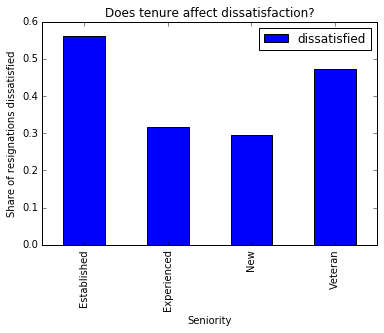

In [60]:
%matplotlib inline
ax=combined_pivot.plot(kind='bar',legend =False)
ax.set_ylabel("Share of resignations dissatisfied")
ax.set_xlabel("Seniority")
ax.set_title("Does tenure affect dissatisfaction?")

From the chart we can see that established and veteran employees are more likely to resign due to dissatisfaction than employees who have sepnt less time in the institution.

In [61]:
combined_updated["age"].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [62]:
#replace whitespace with dash
combined_updated["age"] = combined_updated["age"].str.strip().str.replace('  ','-')

In [63]:
combined_updated["age"].value_counts(dropna=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [64]:
combined_pivot2 = combined_updated.pivot_table(values='dissatisfied',index= 'age')

In [1]:
ax2=combined_pivot2.plot(kind='bar',legend=False)
ax2.set_ylabel("Share of resignations dissatisfied")
ax2.set_xlabel("Age")
ax2.set_title("Does age affect dissatisfaction?")

NameError: name 'combined_pivot2' is not defined

The accuracy of data may be subjected to further scrutiny but it can be inferred that (and consistent with the other chart) that the older employees who resigned were likely to do so due to dissatisfaction.